<a href="https://colab.research.google.com/github/PaoloMissier/DataScience-class-demos/blob/master/synthetic-data-nonlinear_TPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook:

## Creating non-linearly separable synthetic datasets

## Binary classification methods with 2 features for easy visualisation

- linear classification methods: logistic regression, SVM
- non-linear methods: polynomial SVM, RBF SVM

## Evaluating model performance:
- training/test set split,
- generalisation errors
- metrics: accuracy, F1 measures, average_precision_score, AUC (using classification reports)

In [ ]:
import urllib.request

# Imports commonFunctions from github. 
## NOTE: THIS IS A SECURITY RISK IF YOU HAD TO DO THIS IN REAL LIFE
!pip install httpimport
import httpimport

path = 'https://raw.githubusercontent.com/PaoloMissier/DataScience-class-demos/master/CODE/CORE'
with httpimport.remote_repo(['commonFunctions'], path):
    from commonFunctions import *

In [ ]:
!pip install GraphViz

In [ ]:
!pip install tpot

## what happens when the dataset is not _linearly separable_?

In [ ]:
# see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
# and https://scikit-learn.org/stable/datasets/index.html#sample-generators

X, CL = makeDataset(kind='circle', balanced = False, unbalance = 0.8)

402  CL values flipped
class labels ratio: 0.11


again let us first visualise this

<AxesSubplot:>

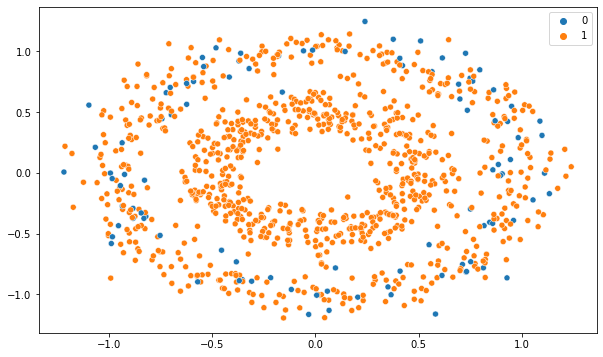

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=CL)

can we still learn a meaningful linear model?

In [ ]:
XTrain, XTest, CLTrain, CLTest = train_test_split(X, CL, test_size = 0.33, random_state = 10)

In [ ]:
XTrainScaled, XTestScaled  = scale(XTrain, XTest)

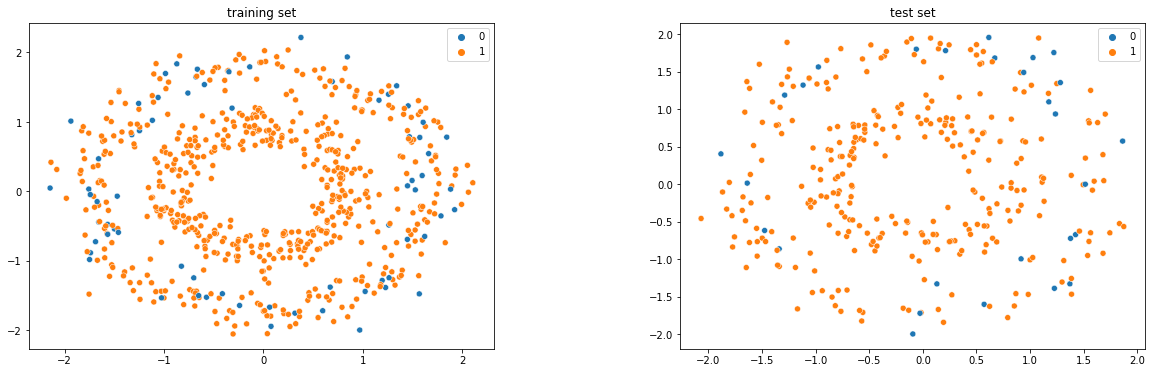

In [ ]:
plotTrainTest(XTrainScaled, CLTrain, XTestScaled, CLTest)

## trying logit

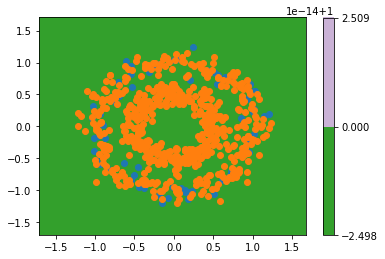

logit classification accuracy on training set: 0.90
logit classification accuracy on test set: 0.88
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.88      1.00      0.94       292

    accuracy                           0.88       330
   macro avg       0.44      0.50      0.47       330
weighted avg       0.78      0.88      0.83       330

average precision score: 0.88
confusion matrix: 
 [[  0  38]
 [  0 292]]
tn: 0.00, fp: 38.000, fn: 0.00, tp: 292.00
using decision_function


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


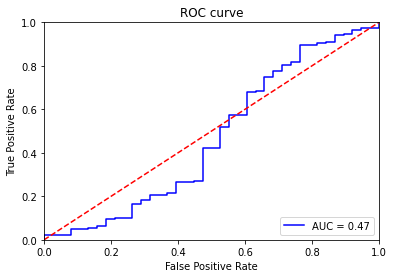

In [ ]:
clf, CL_pred_Train, CL_pred_Test = logit(XTrainScaled, CLTrain, XTestScaled, CLTest)

# plotLinearFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

plotContourFitTrainTestAlternate(clf, XTrain, CLTrain, XTest, CLTest, sharp=True)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)

## Decision trees

logit classification accuracy on training set: 0.90
logit classification accuracy on test set: 0.92
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.92      1.00      0.96       302

    accuracy                           0.92       330
   macro avg       0.46      0.50      0.48       330
weighted avg       0.84      0.92      0.87       330

average precision score: 0.92
confusion matrix: 
 [[  0  28]
 [  0 302]]
tn: 0.00, fp: 28.000, fn: 0.00, tp: 302.00
using predict_proba


/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


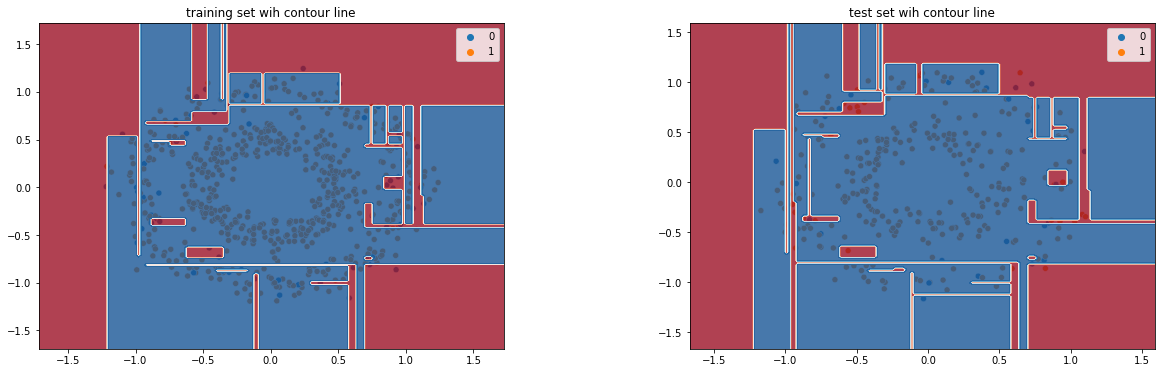

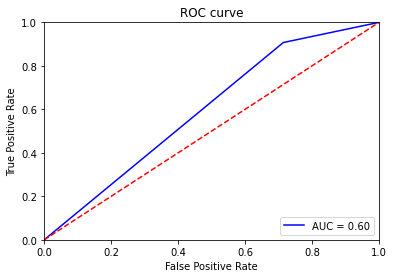

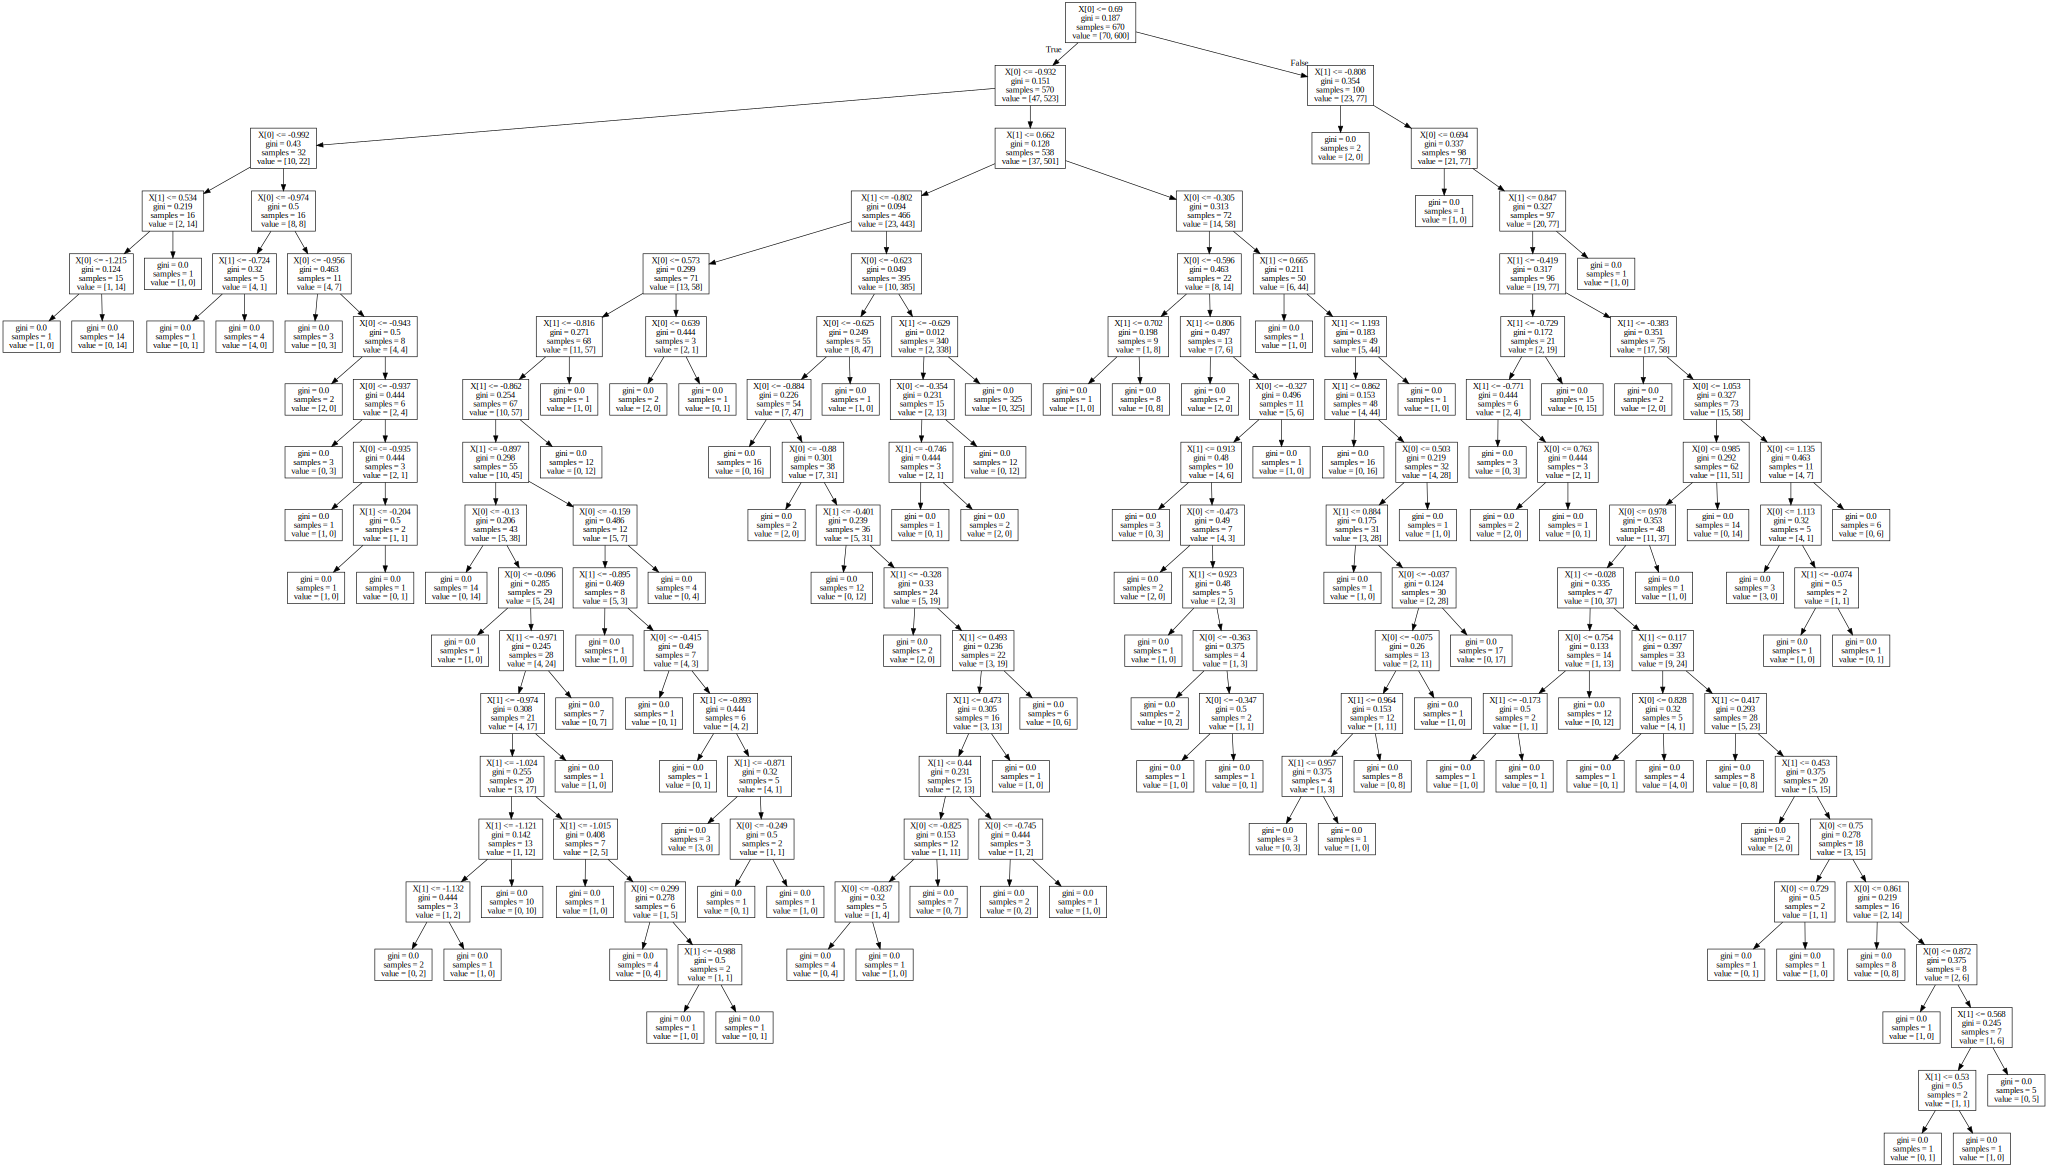

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(XTrain, CLTrain)

plotContourFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)


dot = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot) 
graph


## let's try SVM with a polynomial kernel

logit classification accuracy on training set: 0.90
logit classification accuracy on test set: 0.92
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.92      1.00      0.96       302

    accuracy                           0.92       330
   macro avg       0.46      0.50      0.48       330
weighted avg       0.84      0.92      0.87       330

average precision score: 0.92
confusion matrix: 
 [[  0  28]
 [  0 302]]
tn: 0.00, fp: 28.000, fn: 0.00, tp: 302.00


/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


using decision_function


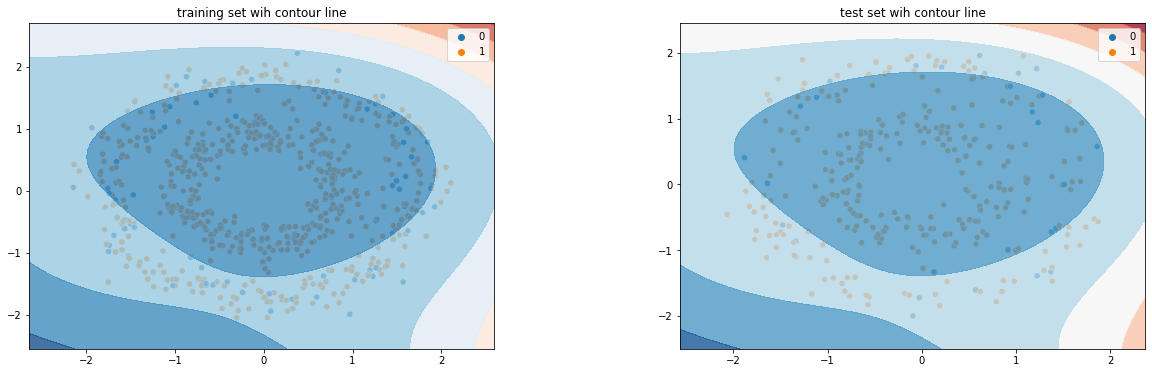

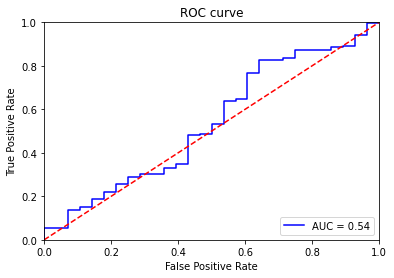

In [ ]:
clf, CL_pred_Train, CL_pred_Test  = SVM(XTrainScaled, CLTrain, XTestScaled, CLTest, kernel='poly')

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotContourFitTrainTest(clf, XTrainScaled, CLTrain, XTestScaled, CLTest)

plotROC(clf, XTest, CLTest)

## and the RBF kernel

logit classification accuracy on training set: 0.90
logit classification accuracy on test set: 0.92
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.92      1.00      0.96       302

    accuracy                           0.92       330
   macro avg       0.46      0.50      0.48       330
weighted avg       0.84      0.92      0.87       330

average precision score: 0.92
confusion matrix: 
 [[  0  28]
 [  0 302]]
tn: 0.00, fp: 28.000, fn: 0.00, tp: 302.00


/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


using decision_function


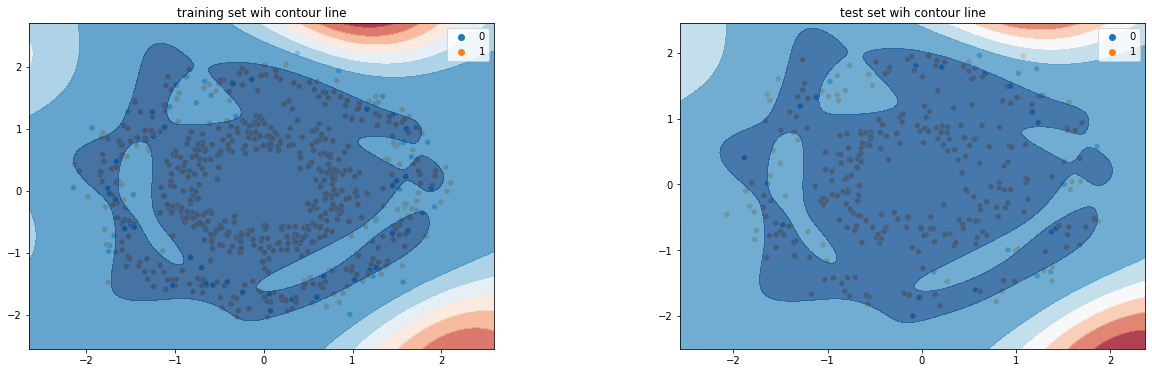

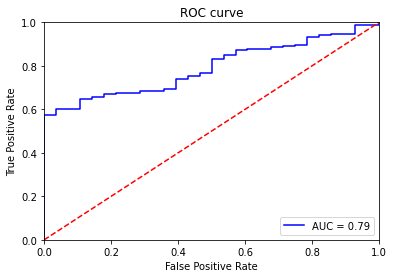

In [ ]:
clf, CL_pred_Train, CL_pred_Test  = SVM(XTrainScaled, CLTrain, XTestScaled, CLTest, kernel='rbf')

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotContourFitTrainTest(clf, XTrainScaled, CLTrain, XTestScaled, CLTest)

plotROC(clf, XTest, CLTest)

In [ ]:


from tpot import TPOTClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
pipeline_optimizer = TPOTClassifier(generations=5, scoring='f1', cv=cv, verbosity=2)

pipeline_optimizer.fit(XTrain, CLTrain)
print(pipeline_optimizer.score(XTrain, CLTrain))
pipeline_optimizer.export('tpot_exported_pipeline_synthetic-data-nonlinear-example.py')



from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(XTrain, CLTrain)
print(pipeline_optimizer.score(XTrain, CLTrain))


Generation 1 - Current best internal CV score: 0.9484292979002622

Generation 2 - Current best internal CV score: 0.9484292979002622

Generation 3 - Current best internal CV score: 0.9491001763892417

Generation 4 - Current best internal CV score: 0.9491001763892417
